In [197]:
# # # # # # # # # # # # # # # # # # #

#      IST 652 Final Project        # 

# # # # # # # # # # # # # # # # # # #

# Spring 2021 - Syracuse University #

# # # # # # # # # # # # # # # # # # # 

#     Created by Nicholas Waine     # 

# # # # # # # # # # # # # # # # # # #

In [198]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [199]:
# First need is to combine 12 separate months of sales data into one file

In [200]:
df = pd.read_csv("C:\\Users\\Nick\\Sales_Data\\Sales_April_2019.csv")

In [201]:
# View all sales files in directory

In [202]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]    

In [203]:
# Concatenate all files to make a single .csv file

In [204]:
all_months_data = pd.DataFrame()

In [205]:
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)

In [206]:
# read in updated dataframe

In [207]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [208]:
# Cleaning the data

In [209]:
# Creating a data frame of all NaN values

In [210]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [211]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [212]:
# Convert columns to correct data type 

In [213]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [214]:
# Add a column that shows month

In [215]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [216]:
# Add a column that shows the city of purchase

In [217]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]


def get_city(address):
    return address.split(',')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [218]:
# Add a column displaying the hour of day (between 0 and 23) of purchase

In [219]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27


In [220]:
# Add a column that shows sales value

In [221]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27,11.99


In [223]:
# Question 1 - Which was the best month for sales, and how much was earned? 

In [224]:
results = all_data.groupby('Month').sum()
print(results)

       Quantity Ordered    Price Each    Hour  Minute         Sales
Month                                                              
1                 10903  1.811768e+06  139485  282440  1.822257e+06
2                 13449  2.188885e+06  172669  354885  2.202022e+06
3                 17005  2.791208e+06  218969  447559  2.807100e+06
4                 20558  3.367671e+06  262259  544186  3.390670e+06
5                 18667  3.135125e+06  238780  487899  3.152607e+06
6                 15253  2.562026e+06  195528  402436  2.577802e+06
7                 16072  2.632540e+06  206169  417349  2.647776e+06
8                 13448  2.230345e+06  172289  353857  2.244468e+06
9                 13109  2.084992e+06  168513  341698  2.097560e+06
10                22703  3.715555e+06  290650  598437  3.736727e+06
11                19798  3.180601e+06  254865  518231  3.199603e+06
12                28114  4.588415e+06  359978  733082  4.613443e+06


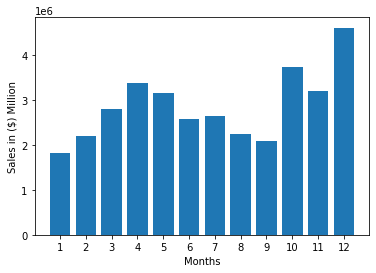

In [225]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in ($) Million')
plt.xlabel("Months")
plt.show()

In [226]:
# Question 2 - Which city sold the most product?

In [227]:
results = all_data.groupby(['City']).sum()

In [228]:
print(results)

                     Quantity Ordered    Price Each   Month    Hour   Minute  \
City                                                                           
 Atlanta (GA)                   16602  2.779908e+06  104794  214264   442932   
 Austin (TX)                    11153  1.809874e+06   69829  141946   289060   
 Boston (MA)                    22528  3.637410e+06  141112  288225   590442   
 Dallas (TX)                    16730  2.752628e+06  104620  214390   435155   
 Los Angeles (CA)               33289  5.421435e+06  208325  427444   866638   
 New York City (NY)             27932  4.635371e+06  175741  357696   733598   
 Portland (ME)                   2750  4.471893e+05   17144   35211    72856   
 Portland (OR)                  11303  1.860558e+06   70621  144421   295533   
 San Francisco (CA)             50239  8.211462e+06  315520  643265  1319477   
 Seattle (WA)                   16553  2.733296e+06  104941  213292   436368   

                            Sales  
Cit

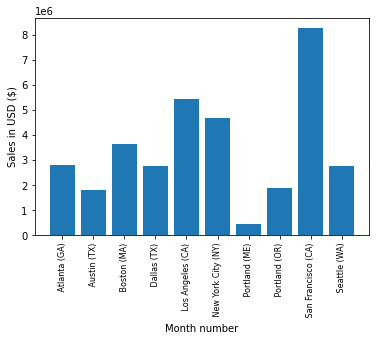

In [229]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [230]:
# Question #3 - What time should advertisements be displayed?

In [231]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [232]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27,11.99


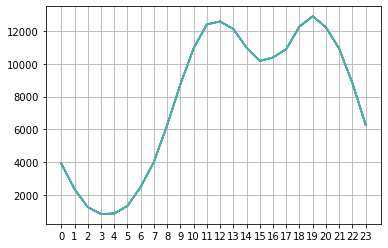

In [234]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

In [162]:
# Question #4 - Which Products are most often sold together?

In [164]:
# Select all rows where order ID numbers appear twice

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-164-c3e2d713975d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [165]:
# Counting unique pairs/triplets of order ID's into a dictionary 

In [235]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # changing this 2 to 3 shows the most common combinations of 3 items

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [236]:
# Question #5 - What product sold the most, and why?

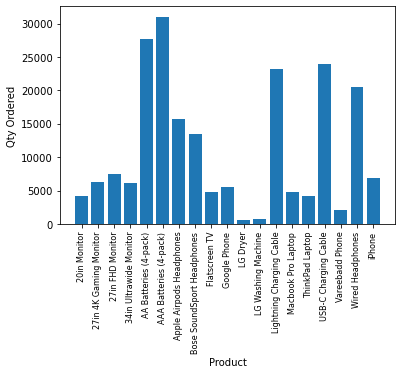

In [237]:
#Grouping by product and viewing the sum totals of each sales info category

product_group = all_data.groupby('Product')
product_group.sum()
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Qty Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

<ipython-input-238-f431c59fb3c2>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
<ipython-input-238-f431c59fb3c2>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


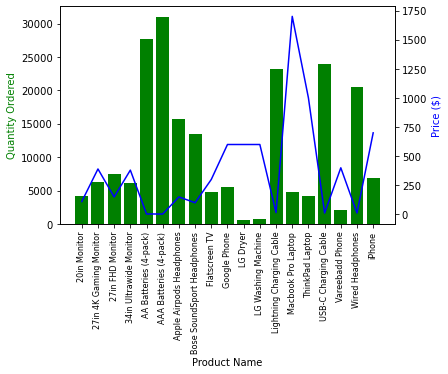

In [238]:
# Hypothesis - Cheapest items sold most because they are cheapest and most needed 

#Looking at the price of each item via the mean of the dollar amount sold per item
prices = all_data.groupby('Product').mean()['Price Each'] 

prices.head(5)

# Overlaying prices over frequency chart of items sold
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()